In [5]:
import pandas as pd
import lightgbm as lgb
import time
path='/home/student303/zz/almama/'

#Read Data
data = pd.read_hdf(path+ 'somefeature/base_feature_all_0.h5', key = 'a')
print('Read Data Finish.')

Read Data Finish.


In [523]:
#Define featurelist
droplist=['instance_id',
          'item_category_list',
          'item_property_list',
          'user_id', 
          'context_id',
          'context_timestamp',
          'predict_category_property',
          'is_trade',
          'day', 'min', 'second',
          
           'user_click_same_item',
            'user_lastclick_sameshop_interval',
            'user_nextclick_sameshop_interval',
            'user_lastclick_interval',
           # 'user_nextclick_interval',
          
            'len_item_property_list',
            'cnt_item_category_hash',
            'cnt_trade_item_category_hash',
         'item_category_hash_cvr',
          'user_nextclick_interval_mean'

         ]
featurelist=[i for i in data.columns if i not in droplist]

In [524]:
featurelist

['item_id',
 'item_brand_id',
 'item_city_id',
 'item_price_level',
 'item_sales_level',
 'item_collected_level',
 'item_pv_level',
 'user_gender_id',
 'user_age_level',
 'user_occupation_id',
 'user_star_level',
 'context_page_id',
 'shop_id',
 'shop_review_num_level',
 'shop_review_positive_rate',
 'shop_star_level',
 'shop_score_service',
 'shop_score_delivery',
 'shop_score_description',
 'item_category_hash',
 'hour',
 'user_nextclick_interval']

In [525]:
%%time
dev=1
print('LGBM Training, Feature dim : ',len(featurelist))
params = {
    'task': 'train',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'max_depth':4,
    #'num_leaves': 6,
    #'min_data_in_leaf':1,
    'learning_rate': 0.1,
    'feature_fraction': 0.8,
    'bagging_fraction': 1.0,
    'verbose': 0,
}
if dev:
    d_train=lgb.Dataset(data.loc[data.day < 24][featurelist], label=data.loc[data.day < 24]['is_trade'])
    d_valid=lgb.Dataset(data.loc[data.day == 24][featurelist], label=data.loc[data.day == 24]['is_trade'])
    model = lgb.train(params, train_set=d_train, num_boost_round=600, valid_sets=[d_train,d_valid], \
                  early_stopping_rounds=50, verbose_eval=10)
    offlinelogloss=model.best_score['valid_1']['binary_logloss']
    bst_iteration=model.best_iteration
else:
    d_train=lgb.Dataset(data.loc[data.day <= 24][featurelist], label=data.loc[data.day <= 24]['is_trade'])    
    model = lgb.train(params, train_set=d_train, num_boost_round=bst_iteration, valid_sets=[d_train], \
                   verbose_eval=50)
print('LGBM Training Done')

LGBM Training, Feature dim :  22
Train until valid scores didn't improve in 50 rounds.
[10]	training's binary_logloss: 0.238967	valid_1's binary_logloss: 0.23568
[20]	training's binary_logloss: 0.12942	valid_1's binary_logloss: 0.124191
[30]	training's binary_logloss: 0.0990538	valid_1's binary_logloss: 0.0925927
[40]	training's binary_logloss: 0.0910917	valid_1's binary_logloss: 0.0840449
[50]	training's binary_logloss: 0.0889513	valid_1's binary_logloss: 0.0818142
[60]	training's binary_logloss: 0.0881202	valid_1's binary_logloss: 0.0811299
[70]	training's binary_logloss: 0.0875921	valid_1's binary_logloss: 0.08079
[80]	training's binary_logloss: 0.0872245	valid_1's binary_logloss: 0.0806619
[90]	training's binary_logloss: 0.0868994	valid_1's binary_logloss: 0.0805924
[100]	training's binary_logloss: 0.0866442	valid_1's binary_logloss: 0.0805793
[110]	training's binary_logloss: 0.0863983	valid_1's binary_logloss: 0.0804944
[120]	training's binary_logloss: 0.0861567	valid_1's binary_l

In [526]:
0.0804086 - 0.0803587

4.989999999999162e-05

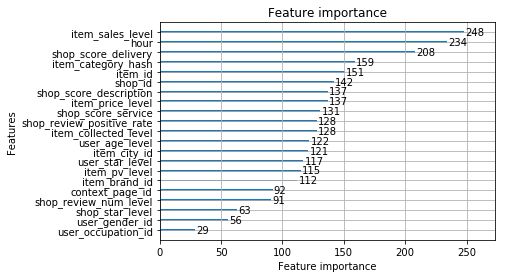

In [12]:
%matplotlib inline
lgb.plot_importance(model)

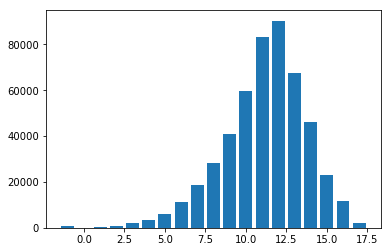

In [152]:
#横坐标：item_sales_level
#纵坐标：点击次数
huatu = data[['day','item_sales_level']].groupby('item_sales_level').count().reset_index()
import matplotlib.pyplot as plt  
num_list = huatu['day']
plt.bar(huatu['item_sales_level'], num_list)  
plt.show()  

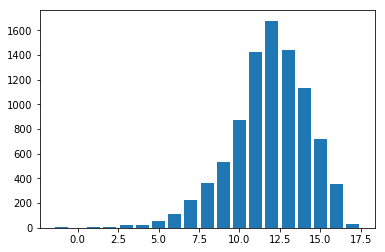

In [148]:
#横坐标：item_sales_level
#纵坐标：交易次数
huatu2 = data[['day','item_sales_level']][data.is_trade == 1].groupby('item_sales_level').count().reset_index()
num_list = huatu2['day'] 
plt.bar(huatu2['item_sales_level'], num_list)  
plt.show()  

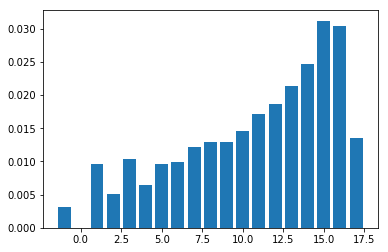

In [158]:
#横坐标：item_sales_level
#纵坐标：转化率
huatu5['rate'] = huatu2['day']/huatu['day']
num_list = huatu5['rate'] 
plt.bar(huatu5['item_sales_level'], num_list)  
plt.show()  

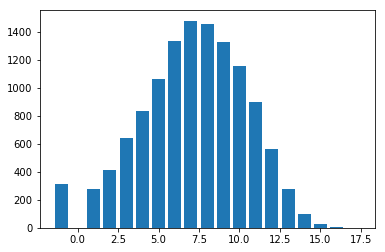

In [47]:
#横坐标：item_sales_level
#纵坐标：商品在各level的个数
huatu3 = data[['item_sales_level','item_id','day']].groupby(['item_sales_level','item_id']).count().groupby('item_sales_level').size().reset_index()
num_list = huatu3[0] 
plt.bar(huatu3['item_sales_level'], num_list)  
plt.show()  

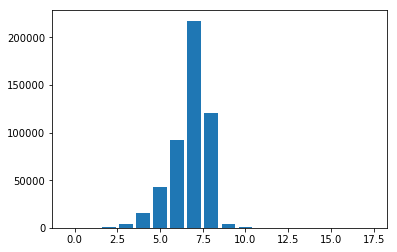

In [70]:
huatu4 = data[['day','item_price_level']].groupby('item_price_level').count().reset_index()
num_list = huatu4['day'] 
plt.bar(huatu4['item_price_level'], num_list)  
plt.show()  

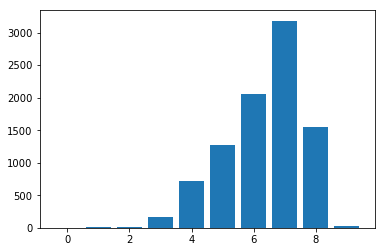

In [73]:
huatu4 = data[['day','item_price_level']][data.is_trade == 1].groupby('item_price_level').count().reset_index()
num_list = huatu4['day'] 
plt.bar(huatu4['item_price_level'], num_list)  
plt.show()  

In [104]:
data[['item_id','day','item_sales_level']][data.item_id == 1097631460775571]

,item_id,day,item_sales_level
15695,1097631460775571,18,9
15698,1097631460775571,18,9
15701,1097631460775571,18,9
15702,1097631460775571,18,9
15709,1097631460775571,18,9
15710,1097631460775571,18,9
15711,1097631460775571,18,9
15713,1097631460775571,18,9
15714,1097631460775571,18,9
89009,1097631460775571,21,9


In [107]:
tmp = data[['item_id','day','item_sales_level']].groupby(['item_id','item_sales_level']).count().groupby(['item_id']).size().reset_index().rename(columns={0:'tmp_cnt'})

In [321]:
data[['item_id','is_trade','item_sales_level','day','hour','min','second']][data.item_id == 5809767789301533998]

,item_id,is_trade,item_sales_level,day,hour,min,second
140011,5809767789301533998,0,3,21,12,56,28
140012,5809767789301533998,0,3,21,21,45,44
213297,5809767789301533998,0,2,19,16,37,3
213298,5809767789301533998,0,2,19,18,21,59
213299,5809767789301533998,0,2,19,18,32,36
213300,5809767789301533998,0,2,19,14,56,40
278277,5809767789301533998,0,3,20,9,4,39
278278,5809767789301533998,0,3,20,8,11,55
343509,5809767789301533998,0,4,22,20,3,12
343510,5809767789301533998,0,4,22,12,25,2


In [317]:
tmp[tmp.tmp_cnt == 5]

,item_id,tmp_cnt
6454,5809767789301533998,5


## 一般不用

In [ ]:
if not dev:
    prob = model.predict(data.loc[data.day > 24][featurelist], num_iteration=bst_iteration)
    output=pd.DataFrame({'instance_id':data.loc[data.day > 24].instance_id.values ,'predicted_score':prob})  
    print('Predicted prob mean is ',prob.mean())

    output_name='Sub_'+time.strftime('%m%d',time.localtime(time.time()))+'_%.5f'%(offlinelogloss)
    output.to_csv(path+'output/'+output_name+'.txt', sep=" ", index=False, line_terminator='\n')

    print('Output success, name : ',output_name)
    print(output.head())

In [528]:
data = pd.read_hdf(path+ 'somefeature/0324base_feature_data_add_time.h5', key = 'a')

In [533]:
data.columns

Index(['instance_id', 'item_id', 'item_category_list', 'item_property_list',
       'item_brand_id', 'item_city_id', 'item_price_level', 'item_sales_level',
       'item_collected_level', 'item_pv_level', 'user_id', 'user_gender_id',
       'user_age_level', 'user_occupation_id', 'user_star_level', 'context_id',
       'context_timestamp', 'context_page_id', 'predict_category_property',
       'shop_id', 'shop_review_num_level', 'shop_review_positive_rate',
       'shop_star_level', 'shop_score_service', 'shop_score_delivery',
       'shop_score_description', 'is_trade', 'item_category_hash', 'day',
       'hour', 'min', 'second', 'user_click_same_item',
       'user_nextclick_interval', 'user_nextclick_interval_mean'],
      dtype='object')

In [534]:
data.to_hdf(path+'somefeature/0327_time_second_xiuzheng.h5',key='a')

In [530]:
data.drop(['user_lastclick_sameshop_interval', 'user_nextclick_sameshop_interval',
       'user_lastclick_interval'],axis=1,inplace=True)

In [ ]:
user_nextclick_sameshop_interval
user_lastclick_interval

In [268]:
def replace_nan(x):
    if x == -1:
        return np.nan
    else:
        return x

In [278]:
#ser_nextclick_sameshop_interval修正
data['A'] = data['user_nextclick_sameshop_interval'].apply(replace_nan)
tmp_merge = data[['A','day']].groupby('day').mean().reset_index().rename(columns={'A':'B'})
data = pd.merge(data, tmp_merge, on='day', how='left')
data['user_nextclick_sameshop_interval_mean'] = data['A'] / data['B']
data['user_nextclick_sameshop_interval_mean'] = data['user_nextclick_sameshop_interval_mean'].fillna(-1)
del data['A']
del data['B']

In [282]:
#user_last_interval修正
data['A'] = data['user_lastclick_interval'].apply(replace_nan)
tmp_merge = data[['A','day']].groupby('day').mean().reset_index().rename(columns={'A':'B'})
data = pd.merge(data, tmp_merge, on='day', how='left')
data['user_lastclick_interval_mean'] = data['A'] / data['B']
data['user_lastclick_interval_mean'] = data['user_lastclick_interval_mean'].fillna(-1)
del data['A']
del data['B']

In [532]:
#user_nextclik_interval修正
data['A'] = data['user_nextclick_interval'].apply(replace_nan)
tmp_merge = data[['A','day']].groupby('day').mean().reset_index().rename(columns={'A':'B'})
data = pd.merge(data, tmp_merge, on='day', how='left')
data['user_nextclick_interval_mean'] = data['A'] / data['B']
data['user_nextclick_interval_mean'] = data['user_nextclick_interval_mean'].fillna(-1)
del data['A']
del data['B']

In [285]:
#data.to_hdf(path + 'somefeature/0326time_mean_xiuzheng.h5',key='a')

In [527]:
data.columns

Index(['instance_id', 'item_id', 'item_category_list', 'item_property_list',
       'item_brand_id', 'item_city_id', 'item_price_level', 'item_sales_level',
       'item_collected_level', 'item_pv_level', 'user_id', 'user_gender_id',
       'user_age_level', 'user_occupation_id', 'user_star_level', 'context_id',
       'context_timestamp', 'context_page_id', 'predict_category_property',
       'shop_id', 'shop_review_num_level', 'shop_review_positive_rate',
       'shop_star_level', 'shop_score_service', 'shop_score_delivery',
       'shop_score_description', 'is_trade', 'item_category_hash', 'day',
       'hour', 'min', 'second', 'user_click_same_item',
       'user_lastclick_sameshop_interval', 'user_nextclick_sameshop_interval',
       'user_lastclick_interval', 'user_nextclick_interval',
       'len_item_property_list', 'cnt_item_category_hash',
       'cnt_trade_item_category_hash', 'item_category_hash_cvr',
       'user_nextclick_interval_mean'],
      dtype='object')

## some guess

In [431]:
data.columns

Index(['instance_id', 'item_id', 'item_category_list', 'item_property_list',
       'item_brand_id', 'item_city_id', 'item_price_level', 'item_sales_level',
       'item_collected_level', 'item_pv_level', 'user_id', 'user_gender_id',
       'user_age_level', 'user_occupation_id', 'user_star_level', 'context_id',
       'context_timestamp', 'context_page_id', 'predict_category_property',
       'shop_id', 'shop_review_num_level', 'shop_review_positive_rate',
       'shop_star_level', 'shop_score_service', 'shop_score_delivery',
       'shop_score_description', 'is_trade', 'item_category_hash', 'day',
       'hour', 'min', 'second', 'user_click_same_item',
       'user_lastclick_sameshop_interval', 'user_nextclick_sameshop_interval',
       'user_lastclick_interval', 'user_nextclick_interval',
       'len_item_property_list', 'len_item_category_list'],
      dtype='object')

In [413]:
def cal_len(x):
    return (len(x.split(';')))

In [417]:
data['len_item_property_list'] = data['item_property_list'].apply(cal_len)

In [424]:
data.len_item_property_list.unique()

array([ 22,  50,  46,  30,  32,  35,  33,  48,  29,  39,  25,  37,  24,
        34,  27,  59,  26,  43,  20,  21,  28,  17,  41,  13,  19,  38,
        23,  45,  36,  49,  51,  31,  44,  16,  18,  40,  15,  14,  64,
        55,  42,  47,  57,  10,  12, 100,  54,  76,  52,  63,   6,  53,
        60,  71,  62,  58,  67,  56,  61,  68,  11,  88,  97,  73,  75,
        85,  82,  89,   9,  70,   8,  93,  66,  91,   7,  72,  65,  74,
        99,  77])

In [438]:
data['len_item_category_list'] = data['item_category_list'].apply(cal_len)

In [443]:
data[['item_category_list','day']][data.len_item_category_list == 3]

,item_category_list,day
9249,7908382889764677758;2642175453151805566;886888...,18
9250,7908382889764677758;2642175453151805566;886888...,18
15747,7908382889764677758;2642175453151805566;623366...,18
15748,7908382889764677758;2642175453151805566;623366...,18
15749,7908382889764677758;2642175453151805566;623366...,18
15750,7908382889764677758;2642175453151805566;623366...,18
15751,7908382889764677758;2642175453151805566;623366...,18
18891,7908382889764677758;2642175453151805566;886888...,18
25168,7908382889764677758;2642175453151805566;886888...,18
25169,7908382889764677758;2642175453151805566;886888...,18


In [466]:
data[['item_category_hash','day','is_trade']].groupby('item_category_hash').count().reset_index()

,item_category_hash,day,is_trade
0,130,2038,2038
1,329,2469,2469
2,1153,78350,78350
3,1443,106527,106527
4,1733,196,196
5,2649,9936,9936
6,5224,127,127
7,5332,74740,74740
8,5737,90,90
9,7795,1981,1981


In [473]:
merger = data[['item_category_hash','is_trade']].groupby('item_category_hash').count().reset_index().rename(columns={'is_trade':'cnt_item_category_hash'})

In [477]:
data = pd.merge(data, merger, on='item_category_hash', how='left')

In [479]:
merger = data[data.is_trade == 1][['item_category_hash','is_trade']].groupby('item_category_hash').count().reset_index().rename(columns={'is_trade':'cnt_trade_item_category_hash'})

In [481]:
data = pd.merge(data, merger, on='item_category_hash', how='left')

In [485]:
tmp = data['cnt_trade_item_category_hash'] / data['cnt_item_category_hash']

In [487]:
data['item_category_hash_cvr'] = data['cnt_trade_item_category_hash'] / data['cnt_item_category_hash']